In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
pi = np.pi

This jupyter notebook is to solve the Laplace problem: 

<center>$\nabla^2 \phi = 0$</center>

with the impermeable boundary conditions for the wall:

<center>$\frac{\partial \phi}{\partial n} = 0$</center>

The gradient of the Green's function with respect to the normal of the surface is given by:

<center>$\frac{\partial G}{\partial n} = \frac{1}{2 \pi r} \frac{ \textbf{r} \cdot \textbf{n} }{ r }$ </center> 


In [7]:
def computeGreenNormal2D( x, y, xj, yj , normalx, normaly ):
    rj2 = (x - xj)**2 + (y - yj)**2
    dGdr = ( 1 / 2 / pi ) / rj2 
    gradrn = normalx * (x - xj) + normaly * (y - yj)
    return dGdr * gradrn

We solve:

<center>$ \phi(p) + \int_S [\phi(q) - \phi(p)] \frac{\partial G}{\partial n}dS = \phi_i(p) $ </center>

which is discretized into the linear system of equations:

<center>$ I \{\phi\} + B \{ \phi \} = A\{\phi\} = \{\phi_i\} $</center>

In [3]:
def createPeriodicSplines( X, Y ):
    tck, u = interpolate.splprep([X, Y], s=0, per=1)
    return tck

def computeNodeLocations( N, tck ):
    t = np.linspace( 0, 1, N )
    x, y = interpolate.splev(t, tck)
    return x, y

def computeNormParameterizationDerivative( N, tck ):
    t = np.linspace( 0, 1, N )
    dx_dt, dy_dt = interpolate.splev(t, tck, der=1)
    ds_dt = np.sqrt( dx_dt**2 + dy_dt**2 )
    return ds_dt

def computeNormal( N, tck ):
    t = np.linspace( 0, 1, N )
    nx, ny = interpolate.splev(t, tck, der=2)
    norm = -np.sqrt( nx**2 + ny**2 )
    return nx/norm, ny/norm

def assembleMatrix( X, Y, N ):
    ## compute geometric information
    tck = createPeriodicSplines( X, Y )
    x, y = computeNodeLocations( N+1, tck )
    ds_dt = computeNormParameterizationDerivative( N+1, tck )
    nx, ny = computeNormal( N+1, tck )
    A = np.identity( N )
    dt = 1/ N
    for i in range( N ):
        for j in range( N ):
            if (i != j):
                A[i, i] = A[i, i] - computeGreenNormal2D( x[i], y[i], x[j], y[j], nx[i], ny[i] ) * ds_dt[i] * dt
                A[i, j] = computeGreenNormal2D( x[i], y[i], x[j], y[j], nx[i], ny[i] ) * ds_dt[i] * dt
    return A

def assembleSourceTerm( X, N ):
    b = np.zeros( N )
    for i in range( N ):
        b[i] = U * x[i]
    return b



# Flow around a Cylinder

For validation purposes we compute numerically the potential for a cylinder:
<center>$ \phi(r, \theta) = U_0 r ( 1 + (\frac{R}{r})^2 ) cos(\theta)$ </center> 
where R is the radius of the cylinder and $U_0$ the freestream velocity

/Users/daniellam/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning: Setting x[1][65]=x[1][0]
  (i, m, i)))


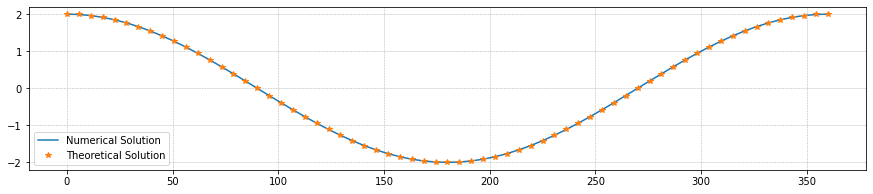

In [6]:
## validation of BIM about circle

N = 64 
U0 = 1 



## create geometry
R = 1
t = np.linspace( 0, 1, N + 1 )
dt = t[1] - t[0] 

a = 1
b = 1

x = a * R * np.cos( 2 * pi * t )
y = b * R * np.sin( 2 * pi * t )


## create system of equations
A = assembleMatrix( x, y, N )
b = assembleSourceTerm( x, N )

## solve system of equations
phi = np.linalg.solve( A, b )


## plot solution
theta = np.linspace( 0, 2 * pi, N + 1 )
theoreticalSolution = U * r0 * 2 * np.cos( theta )

fig, ax = plt.subplots(figsize=(15, 3))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)

ax.plot( theta[:] * 360 / 2 / pi, np.concatenate( (phi, [phi[0]])), label="Numerical Solution" )
# ax.plot( theta[:] * 360 / 2 / pi, theoreticalSolution[:], '*', label="Theoretical Solution" )
theoreticalSolution = U * x + U * r0 * x / (x[:]**2 + y[:]**2)**.5
ax.plot( theta[:] * 360 / 2 / pi, theoreticalSolution[:], '*', label="Theoretical Solution" )


ax.legend()


# Flow Around an Elliptical Cylinder
WIP (obtain analytical solution first)

/Users/daniellam/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:227: RuntimeWarning: Setting x[1][65]=x[1][0]
  (i, m, i)))


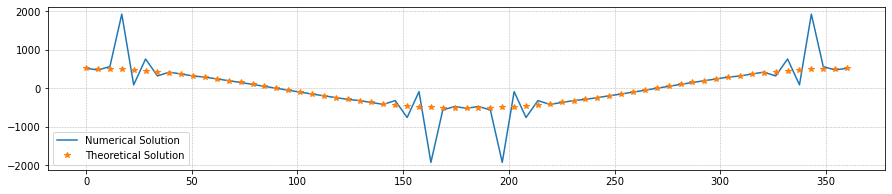

In [16]:
## validation of BIM about circle

N = 64
U0 = 1 



## create geometry
R = 1
t = np.linspace( 0, 1, N + 1 )
dt = t[1] - t[0] 

a = 512
b = 1

x = a * R * np.cos( 2 * pi * t )
y = b * R * np.sin( 2 * pi * t )


## create system of equations
A = assembleMatrix( x, y, N )
b = assembleSourceTerm( x, N )

## solve system of equations
phi = np.linalg.solve( A, b )


## plot solution
theta = np.linspace( 0, 2 * pi, N + 1 )
theoreticalSolution = U * r0 * 2 * np.cos( theta )

fig, ax = plt.subplots(figsize=(15, 3))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)

ax.plot( theta[:] * 360 / 2 / pi, np.concatenate( (phi, [phi[0]])), label="Numerical Solution" )
# ax.plot( theta[:] * 360 / 2 / pi, theoreticalSolution[:], '*', label="Theoretical Solution" )
theoreticalSolution = U * x + U * r0 * x / (x[:]**2 + y[:]**2)**.5
ax.plot( theta[:] * 360 / 2 / pi, theoreticalSolution[:], '*', label="Theoretical Solution" )


ax.legend()



# Flow about NACA airfoil
The formula for the shape of a NACA 00xx foil, with "xx" being replaced by the percentage of thickness to chord, is
<center>$ y(x) = 0.2969 * x^{1/2} - 0.1260 * x - 0.3516 * x^2 + 0.2843 * x^3 - 0.1015 * x^4$</center>

In [ ]:
N = 512
xu = np.linspace(0, 1, N)
yu = 0.2969 * xu[:]**.5 - 0.1260 * xu[:] - 0.3516 * xu[:]**2 + 0.2843 * xu[:]**3 - 0.1015 * xu[:]**4
yl = - yu


y = np.zeros(0)
x = np.zeros(0)
for i in range(N-1, 0, -1):
    y = np.concatenate( (y, [yu[i]]) )
    x = np.concatenate( (x, [xu[i]]) )
    
y = np.concatenate( (y, yl[:]) )
x = np.concatenate( (x, xu[:]) )


fig, ax = plt.subplots(figsize=(15, 3))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
plt.plot( x, y )

N = 512
tck = createPeriodicSplines( x, y )
x, y = computeNodeLocations( N, tck )

plt.plot( x, y )

A = assembleMatrix( x, y, N )
b = x
phi = np.linalg.solve( A, b )
plt.plot( x, phi, '*')

In [ ]:
## validation of BIM about circle
N = 2**4
U = 1

r0 = 1

t = np.linspace( 0, 1, N + 1 )
dt = t[1] - t[0] 

a = 1

x = a * r0 * np.cos( 2 * pi * t )
y = r0 * np.sin( 2 * pi * t )



firstOrderDifference = createFirstOrderDifferenceMatrix( N )
s = computeDistanceBetweenNodes( x, y )
ds_dt = np.matmul( firstOrderDifference, s ) / dt
ds_dt = np.sqrt(  (np.matmul( firstOrderDifference, x[:-1] ) /2 / dt)**2 + (np.matmul( firstOrderDifference, y[:-1] )/ 2 / dt)**2   )
print( "ds_dt = " + str(ds_dt[0]) )
print( "2pi*r = " + str(2 * pi) )


normalx = np.cos( 2 * pi * t )
normaly = np.sin( 2 * pi * t )

theta = np.linspace( 0, 2 * pi, N + 1 )
theoreticalSolution = U * r0 * 2 * np.cos( theta )

## create linear system of equations
A = np.identity( N )
b = np.zeros( N )
for i in range( N ):
    b[i] = U * x[i]
    for j in range( N ):
        if i != j:
            A[i, i] = A[i, i] - GREENNORMAL2D( x[i], y[i], x[j], y[j], normalx[i], normaly[i] ) * ds_dt[i]* dt
            A[i, j] = GREENNORMAL2D( x[i], y[i], x[j], y[j], normalx[i], normaly[i] ) * ds_dt[i] * dt

phi = np.linalg.solve( A, b )


fig, ax = plt.subplots(figsize=(15, 3))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)

ax.plot( theta[:] * 360 / 2 / pi, np.concatenate( (phi, [phi[0]])), label="Numerical Solution" )
ax.plot( theta[:] * 360 / 2 / pi, theoreticalSolution[:], '*', label="Theoretical Solution" )
theoreticalSolution = U * x + U * r0 * x / (x[:]**2 + y[:]**2)**.5
# ax.plot( theta[:] * 360 / 2 / pi, theoreticalSolution[:], '*', label="Theoretical Solution" )


ax.legend()



# Future work

1. compute pressure and velocity from the potential flow solution.
2. go from trapezoidal rule to gaussian quadrature 
3. include wake modelling and validate the method for flow around a cylinder and elliptical cylinder